We give an example of a custom monoidal category in `discopy`, with a monoidal functor into it.

The monoidal category is given by the delooping of a commutative monoid, see the [nLab](https://ncatlab.org/nlab/show/delooping). It has one object, arrows given by the monoid elements, composition and tensor both given by the monoid product.

We encode a context-free grammar as a free monoidal category, then taking monoidal functors into the delooping of the nonnegative reals yields a [weighted context-free grammar](https://en.wikipedia.org/wiki/Probabilistic_context-free_grammar#Weighted_context-free_grammar).

In [1]:
from discopy import Ty, Box, Id, Functor

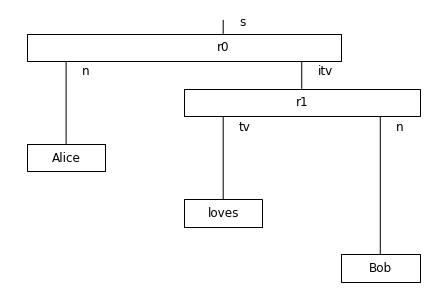

In [2]:
# The CFG's non-terminals are types.

s, n, tv, itv = Ty('s'), Ty('n'), Ty('tv'), Ty('itv')

# The CFG's production rules are boxes.

r0 = Box('r0', s, n @ itv)
r1 = Box('r1', itv, tv @ n)

# We model the words as effects, i.e. boxes with empty codomains.

Alice = Box('Alice', n, Ty())
loves = Box('loves', tv, Ty())
Bob = Box('Bob', n, Ty())

# A syntax tree is a diagram!

syntax_tree = r0 >> Id(n) @ r1
sentence = syntax_tree >> Alice @ loves @ Bob
sentence.draw(aspect='auto')

In [3]:
"""
We define monoid elements as a subclass of Box.
It is enough to override __init__, __repr__, then, tensor and id.
"""

class Monoid(Box):
    def __init__(self, m):
        self.m = m
        super().__init__(m, Ty(), Ty())

    def __repr__(self):
        return "Monoid({})".format(self.m)
    
    def then(self, other):
        if not isinstance(other, Monoid):
            import pdb; pdb.set_trace()
            raise ValueError
        return Monoid(self.m * other.m)
    
    def tensor(self, other):
        return self.then(other)
    
    @staticmethod
    def id(x):
        if x != Ty():
            raise ValueError
        return Monoid(1)

# Now we can take arbitrary diagrams with Monoid boxes.
# Both tensor and composition are given by product, the unit is 1.
Monoid(2) @ Monoid.id(Ty()) >> Monoid(5) @ Monoid(0.1)

Monoid(1.0)

In [4]:
"""
We define monoid functors as a subclass of monoidal functors. 
"""

class MonoidFunctor(Functor):
    def __init__(self, ob, ar):
        super().__init__(ob, ar, ar_factory=Monoid)

ob = {x: Ty() for x in [s, n, tv, itv]}
ar = {r0: Monoid(0.25), r1: Monoid(2.0)}
ar.update({w: Monoid(1) for w in [Alice, loves, Bob]})

F = MonoidFunctor(ob, ar)
F(sentence)

Monoid(0.5)